In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../METRO Interstate/Metro_Interstate_Traffic_Volume.csv')

for c in df.columns:
    print(c)

holiday
temp
rain_1h
snow_1h
clouds_all
weather_main
weather_description
date_time
traffic_volume


In [3]:
def kelvin_to_celsius(k):
    return round(k - 273.15)

df['temp'] = df['temp'].apply(kelvin_to_celsius)
df = df[df['temp'] > -50] # remove outliers


In [4]:
time_of_day = {
    "night": range(0, 6),
    "morning": range(6, 12),
    "afternoon": range(12, 18),
    "evening": range(18, 24)
}

temperture = {
    "cold": range(-30, 0),
    "cool": range(0, 10),
    "mild": range(10, 20),
    "warm": range(20, 30),
    "hot": range(30, 50)
}

other_weather = ['Drizzle', 'Haze', 'Fog', 'Thunderstorm', 'Snow', 'Squall', 'Smoke']

def get_time_of_day(x):
    hour = int(x.split(' ')[1].split(':')[0])
    for time_category, time_range in time_of_day.items():
        if hour in time_range:
            return time_category
        
def is_weekend(x):
    date = x.split(' ')[0]
    year, month, day = date.split('-')
    weekday = datetime.datetime(int(year), int(month), int(day)).weekday()
    return 1 if weekday >= 5 else 0

def get_temp_category(x):
    for temp_category, temp_range in temperture.items():
        if x in temp_range:
            return temp_category

def convert_weather(x):
    return 'other' if x in other_weather else x.lower()

In [5]:
df['temp'] = df['temp'].apply(get_temp_category)
df['time_of_day'] = df['date_time'].apply(get_time_of_day)
df['weekend'] = df['date_time'].apply(is_weekend)
df['weather'] = df['weather_main'].apply(convert_weather)

df = df.drop(columns=['date_time', 'holiday', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main', 'weather_description', 'date_time'])
order = ['temp', 'time_of_day', 'weather', 'weekend', 'traffic_volume']
df = df[order]

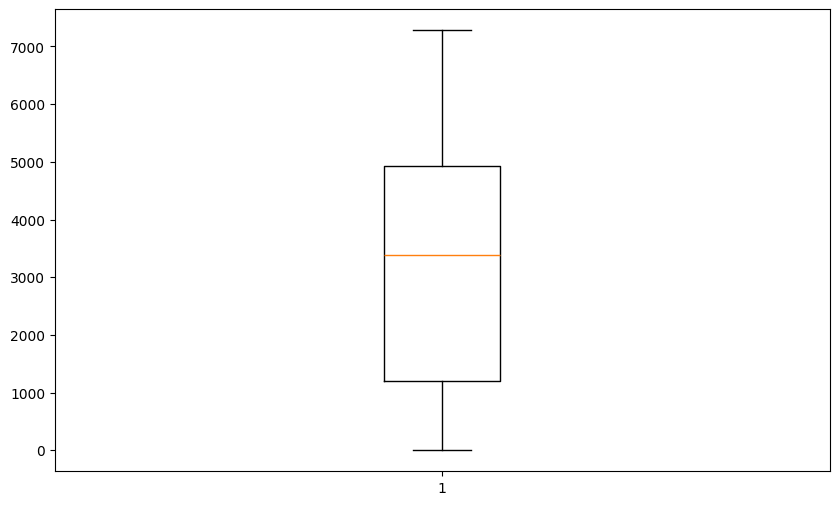

In [6]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['traffic_volume'])
plt.show()

q1 = df['traffic_volume'].quantile(0.25).astype(int)
q2 = df['traffic_volume'].quantile(0.5).astype(int)
q3 = df['traffic_volume'].quantile(0.75).astype(int)

min_traffic = df['traffic_volume'].min()
max_traffic = df['traffic_volume'].max()

traffic_categories = {
    'low_volume': (min_traffic, q1),
    'medium_volume': (q1, q2),
    'high_volume': (q2, q3),
    'very_high_volume': (q3, max_traffic + 1)
}

def categorize_traffic_volume(volume):
    volume = int(volume)
    for category, (lower, upper) in traffic_categories.items():
        if lower <= volume < upper:
            return category
        
df['traffic_volume_category'] = df['traffic_volume'].apply(categorize_traffic_volume)

In [7]:
df.to_csv('../data/metro_interstate_traffic_volume_processed.csv', index=False)